<a href="https://colab.research.google.com/github/BritneyMuller/colab-notebooks/blob/master/Time_Series_Traffic_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook was created by [Britney Muller](http://twitter.com/BritneyMuller) from Facebook's open source [Prophet time-series prediction model](https://facebook.github.io/prophet/):

#Hold Shift + Return to run the below cell and upload your timeseries.csv data (preferably 3+ years worth). Headers must look like the following.
## Columns:

###Ds = month/day/year (acsending)

### Y = timeseries data
![alt text](https://i.imgur.com/QebUg9F.png)



In [ ]:
# Import nessecary libraries and data. [Shift + Return to run cell]
import os
import yaml
import datetime
from datetime import date
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)

#import plotly.offline as py
#py.init_notebook_mode()

# Did some pre processing of the CSV. 
# Specficially I:
#   - truncated a bunch of notes at the top of the file
 #   - removed some whitespace at the end of file

from google.colab import files
uploaded = files.upload()

#Upload your Time Series data:

Saving glowforge-forecasting.csv to glowforge-forecasting.csv


<Figure size 640x480 with 0 Axes>

#Import data into a Pandas dataframe:

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['glowforge-forecasting.csv']))
# Dataset is now stored in a Pandas Dataframe


#Validate the dataframe's head (top 5 rows)

In [ ]:
df.head()

,Ds,Y,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1/27/17,2188,NaN,NaN,NaN,NaN,NaN,NaN
1,1/28/17,2296,NaN,NaN,NaN,NaN,NaN,NaN
2,1/29/17,1973,NaN,NaN,NaN,NaN,NaN,NaN
3,1/30/17,2152,NaN,NaN,NaN,NaN,NaN,NaN
4,1/31/17,2726,NaN,NaN,NaN,NaN,NaN,NaN


# Explore known dataframe types (not necessary, but good to know)

In [ ]:
print(df.dtypes)

Ds             object
Y               int64
Unnamed: 2    float64
Unnamed: 3    float64
Unnamed: 4    float64
Unnamed: 5    float64
Unnamed: 6    float64
Unnamed: 7    float64
dtype: object


#Drop extra columns to clean up your dataframe

In [ ]:
#data cleanup
df['ds'] = df['Ds']
df['y'] = df['Y']
#drop extra columns
df = df[['ds', 'y']]

#Reevaluate your dataframe's head:

In [ ]:
df.head()

,ds,y
0,1/27/17,2188
1,1/28/17,2296
2,1/29/17,1973
3,1/30/17,2152
4,1/31/17,2726


##Convert to a date time

In [ ]:
#df['ds'] = df['ds'].astype('datetime64[ns]')
df['ds'] = pd.to_datetime(df['ds'])

#Make model & fit it to your data

In [ ]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#Make a future data frame

In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1124,2020-02-25
1125,2020-02-26
1126,2020-02-27
1127,2020-02-28
1128,2020-02-29


#Predict future data over a period of time 

Modify the number of days predicted by changing forecast.tail(*X*)

In [ ]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1099,2020-01-31,7745.792156,7168.035154,8582.801506,7745.792156,7745.792156,122.826367,122.826367,122.826367,-36.809948,-36.809948,-36.809948,159.636316,159.636316,159.636316,0.0,0.0,0.0,7868.618523
1100,2020-02-01,7757.723406,6609.519105,7916.429902,7757.723406,7757.723406,-518.948880,-518.948880,-518.948880,-678.578701,-678.578701,-678.578701,159.629821,159.629821,159.629821,0.0,0.0,0.0,7238.774525
1101,2020-02-02,7769.654655,6859.976143,8207.550520,7769.654655,7769.654655,-222.377736,-222.377736,-222.377736,-384.517197,-384.517197,-384.517197,162.139462,162.139462,162.139462,0.0,0.0,0.0,7547.276919
1102,2020-02-03,7781.585904,7567.993748,8915.823435,7781.585904,7781.585904,474.869579,474.869579,474.869579,307.767345,307.767345,307.767345,167.102235,167.102235,167.102235,0.0,0.0,0.0,8256.455484
1103,2020-02-04,7793.517154,7623.805063,8927.025445,7793.517154,7793.517154,470.159636,470.159636,470.159636,295.765307,295.765307,295.765307,174.394329,174.394329,174.394329,0.0,0.0,0.0,8263.676789
1104,2020-02-05,7805.448403,7588.475635,8956.234062,7805.448403,7805.448403,437.915328,437.915328,437.915328,254.080591,254.080591,254.080591,183.834737,183.834737,183.834737,0.0,0.0,0.0,8243.363731
1105,2020-02-06,7817.379653,7534.119284,8967.015807,7817.379653,7817.379653,437.483089,437.483089,437.483089,242.292604,242.292604,242.292604,195.190485,195.190485,195.190485,0.0,0.0,0.0,8254.862742
1106,2020-02-07,7829.310902,7310.393516,8696.303653,7829.310902,7829.310902,171.373369,171.373369,171.373369,-36.809948,-36.809948,-36.809948,208.183318,208.183318,208.183318,0.0,0.0,0.0,8000.684271
1107,2020-02-08,7841.242152,6664.157730,8109.251338,7841.242152,7841.242152,-456.081068,-456.081068,-456.081068,-678.578701,-678.578701,-678.578701,222.497633,222.497633,222.497633,0.0,0.0,0.0,7385.161084
1108,2020-02-09,7853.173401,6983.514391,8412.959150,7853.172567,7853.254180,-146.727777,-146.727777,-146.727777,-384.517197,-384.517197,-384.517197,237.789421,237.789421,237.789421,0.0,0.0,0.0,7706.445624


#Plot the model's prediction

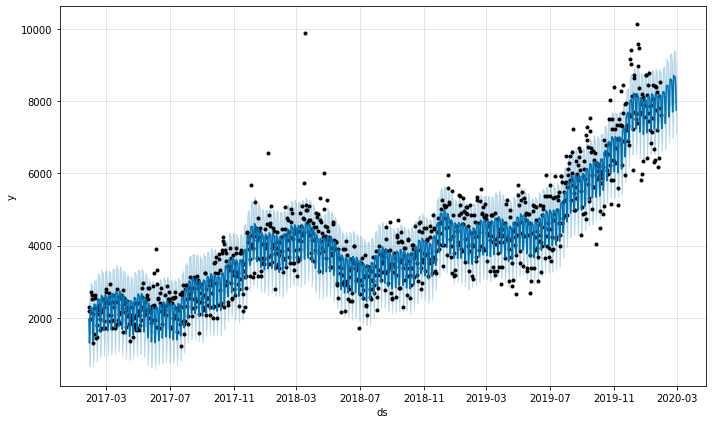

In [ ]:
fig1 = m.plot(forecast)

#Explore Yearly, Weekly & Monthly Trends

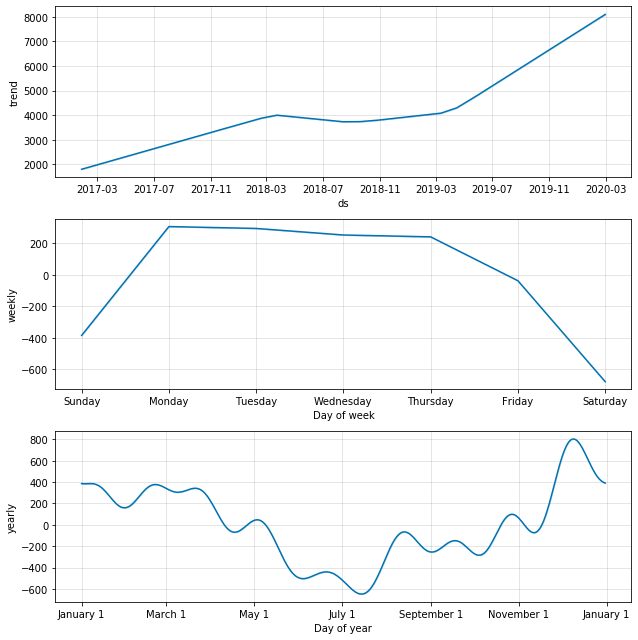

In [ ]:
fig2 = m.plot_components(forecast)

#Pick a forecast date in the past to evaluate how well your actual data did vs. this model's prediction:

In [ ]:
forecast_date = '07-01-2019'


#Remove data that occured after this start date

In [ ]:
mask = (df['ds'] < forecast_date)
df2 = df.loc[mask]
df2.head()

,ds,y
0,2017-01-27,2188
1,2017-01-28,2296
2,2017-01-29,1973
3,2017-01-30,2152
4,2017-01-31,2726


In [ ]:

# Make model and fit it
m2 = Prophet()
m2.fit(df2)

# Make a future data frame
future = m2.make_future_dataframe(periods=90)
future.tail()

# Predict the GA data over the future period
forecast = m2.predict(future)
forecast.tail()
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
970,2019-09-24,4703.882530,4127.324696,5421.948093,4640.822220,4774.375448,61.562166,61.562166,61.562166,267.485306,267.485306,267.485306,-205.923140,-205.923140,-205.923140,0.0,0.0,0.0,4765.444696
971,2019-09-25,4706.570728,4064.679808,5381.036883,4642.169714,4778.081751,63.516597,63.516597,63.516597,262.550266,262.550266,262.550266,-199.033669,-199.033669,-199.033669,0.0,0.0,0.0,4770.087326
972,2019-09-26,4709.258927,4050.087148,5330.451689,4643.471753,4781.926128,8.476441,8.476441,8.476441,201.217551,201.217551,201.217551,-192.741111,-192.741111,-192.741111,0.0,0.0,0.0,4717.735368
973,2019-09-27,4711.947125,3834.107228,5126.787308,4645.000469,4785.527485,-230.644958,-230.644958,-230.644958,-43.696138,-43.696138,-43.696138,-186.948820,-186.948820,-186.948820,0.0,0.0,0.0,4481.302167
974,2019-09-28,4714.635324,3266.652617,4534.964235,4646.321513,4789.958589,-806.335174,-806.335174,-806.335174,-624.802090,-624.802090,-624.802090,-181.533083,-181.533083,-181.533083,0.0,0.0,0.0,3908.300150


#Plot the model's prediction

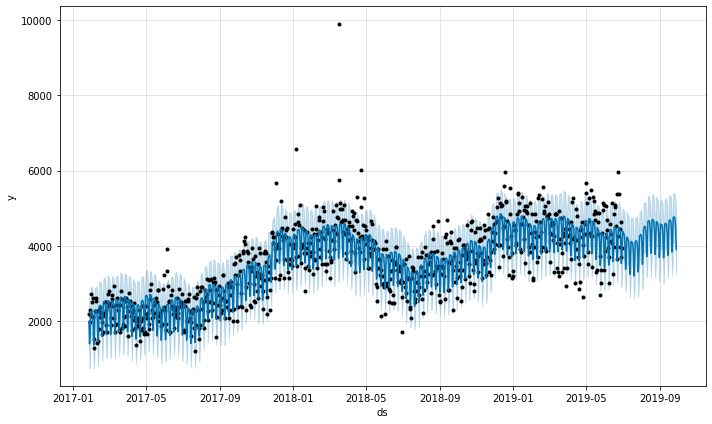

In [ ]:
# plot the forecast
fig2 = m2.plot(forecast)

In [ ]:
# Merge actuals with forecast
forecast_plot = forecast[['ds', 'yhat']]
df_inner = pd.merge(forecast_plot, df, on='ds', how='inner')
df_inner.tail()

,ds,yhat,y
970,2019-09-24,4765.444696,6386
971,2019-09-25,4770.087326,5632
972,2019-09-26,4717.735368,6565
973,2019-09-27,4481.302167,6242
974,2019-09-28,3908.300150,4054


In [ ]:

mask = (df_inner['ds'] > forecast_date)
df2_plot = df_inner.loc[mask]
df2_plot.tail()

,ds,yhat,y
970,2019-09-24,4765.444696,6386
971,2019-09-25,4770.087326,5632
972,2019-09-26,4717.735368,6565
973,2019-09-27,4481.302167,6242
974,2019-09-28,3908.300150,4054


#Evaluate actual results vs forecast to see how you did against the model's prediction

Prediction values are the light blue dashed line.

Actual values are the solid black line.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.



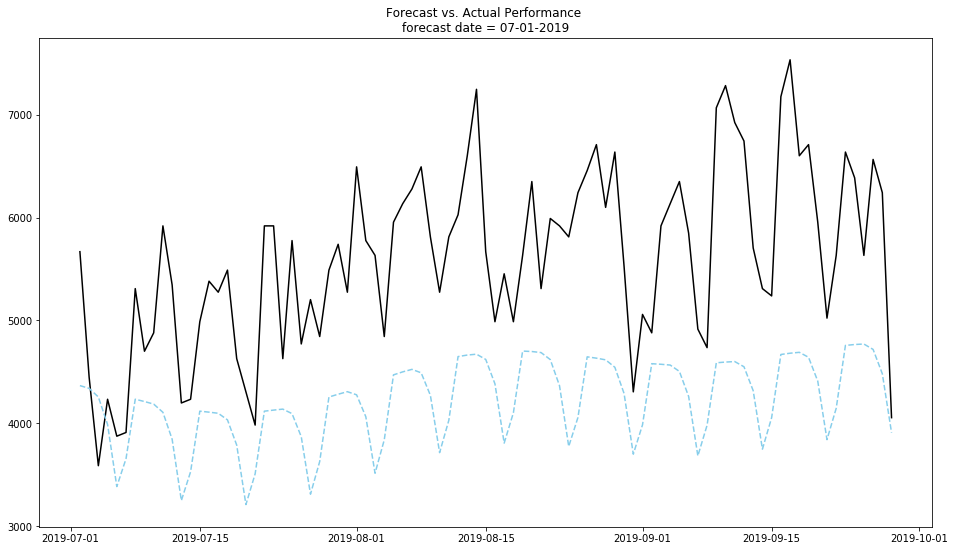

In [ ]:
# Plot actuals vs forecast
plt.figure(figsize=(16, 9))
plt.title(label='Forecast vs. Actual Performance \n' + 'forecast date = ' + forecast_date)
plt.plot('ds', 'y', data=df2_plot, color='black')
plt.plot('ds', 'yhat', data=df2_plot, color ='skyblue', linestyle='dashed')
plt.show()